In [ ]:
# https://albertauyeung.github.io/2017/04/23/python-matrix-factorization.html/

In [ ]:
# Matrix Factorization: A Simple Tutorial and Implementation in Python

In [ ]:
# U of users, and a set D of items. Let R of size ∥U∥×∥D∥ be the matrix. 
# we assume that we would like to discover K latent features.

In [105]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [102]:
import numpy as np

class MF():

    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):         # Initialize user and item latent feature matrice
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initialize the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # Create a list of training samples
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]
        
        training_process = [] # Perform stochastic gradient descent for number of iterations
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd() #sgd called
            mse = self.mse()# mse called
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    def mse(self): # Mean Square Error.  # FULL MATRIX CALLED
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix() #full matrix called
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self): # Stochastic Gradient Descent #GET RATING called
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j) # get rating called
            e = (r - prediction)

            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            # Update user and item latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def full_matrix(self):
        return self.b + self.b_u[:,np.newaxis] + self.b_i[np.newaxis:,] + self.P.dot(self.Q.T)

In [103]:
R = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])

mf = MF(R, K=2, alpha=0.1, beta=0.01, iterations=20)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()
print("Global bias:")
print(mf.b)
print()
print("User bias:")
print(mf.b_u)
print()
print("Item bias:")
print(mf.b_i)

Iteration: 10 ; error = 0.3742
Iteration: 20 ; error = 0.1063

P x Q:
[[4.97285535 3.01461582 1.15681211 1.00642521]
 [3.99963503 2.28939754 1.17227679 1.01202904]
 [0.97693962 1.06259523 5.78172675 4.9657498 ]
 [1.02238402 0.83452967 4.47824238 3.99279118]
 [1.1646647  0.97325392 4.95726938 4.03811105]]

Global bias:
2.769230769230769

User bias:
[ 0.18854164 -0.32727054  0.21182788 -0.3836686  -0.06269968]

Item bias:
[-0.08226112 -0.9730295   0.600757    0.10691078]


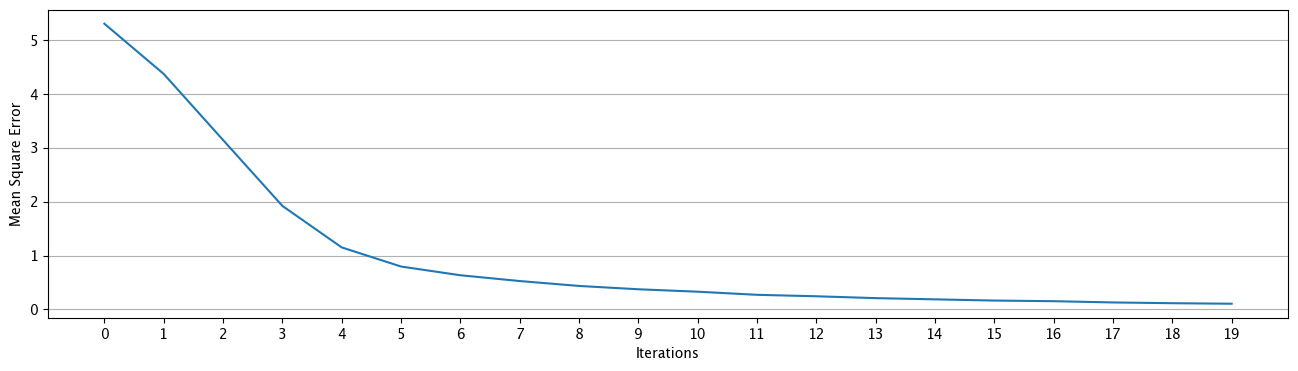

In [106]:
x = [x for x, y in training_process]
y = [y for x, y in training_process]
plt.figure(figsize=((16,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Iterations")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")